## Diffusion

We're going to solve the following problem:

\begin{equation*}
\frac{\partial \rho (x, t)}{\partial t} = D \frac{\partial ^ 2 \rho (x, t)}{\partial x ^ 2}
\end{equation*}

With the following initial condition:

\begin{equation*}
\rho(x, 0) = \rho_0(x)
\end{equation*}

And also with these boundary conditions:

\begin{equation*}
\begin{cases}
\rho(L, t) = 0 \\
\rho(0, t) = 0
\end{cases}
\end{equation*}

Using the separation of variables method the solution is:

\begin{equation*}
\rho (x, t) = \sum _{n = 1} ^ {\infty} c_n \sin \left(\frac{n \pi}{L} x \right)
\end{equation*}

Where $ c_n $ is provided by the following integral:

\begin{equation*}
c_n = \frac{2}{L} \int_0^L \rho_0(x) \sin\left(\frac{n \pi}{L} x\right) \, dx
\end{equation*}

In [28]:
# Importing libraries
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

plt.style.use("bmh")

In [29]:
# Defining constants
L = 2
D = 0.1

In [30]:
# Defining rho(x, 0)
def rho_0(x):
    if x >= L / 2 and x <= L:
        return 1
    else:
        return 0
    
rho_0 = np.vectorize(rho_0) # From Python to NumPy function

Text(0.5, 1.0, 'Initial Density Function')

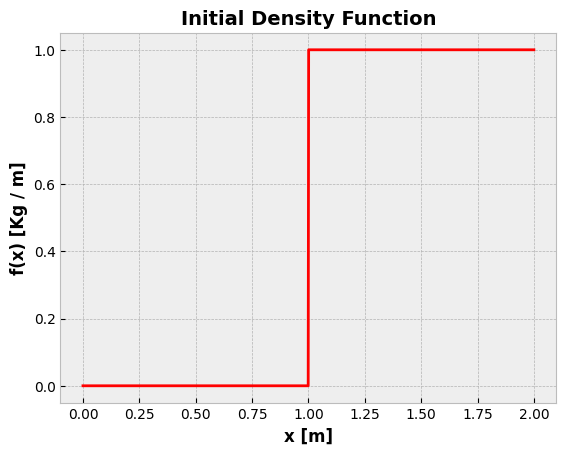

In [31]:
# Plotting rho(x, 0)
x = np.linspace(0, L, 1000)

plt.plot(x, rho_0(x), color= 'red')
plt.xlabel("x [m]", fontsize= 12, fontweight= "bold")
plt.ylabel("f(x) [Kg / m]", fontsize= 12, fontweight= "bold")
plt.title("Initial Density Function", fontsize= 14, fontweight= "bold")

In [32]:
# Defining the solution
def rho(x, t):
    sum = 0
    for j in range(1, 201, 1):
        sum += ((2 / L) * quad(lambda x, n: rho_0(x) * np.sin((np.pi * n * x) / L), 0, L, args= j)[0]) * np.sin((np.pi * j * x) / L) * np.exp(- ((np.pi ** 2) * D * (j ** 2) * t ) / ( L ** 2))
    
    return sum

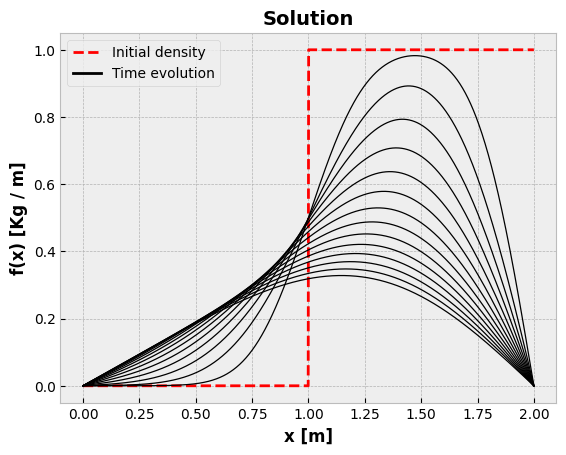

In [33]:
# Plotting the solution for different times
t = np.arange(0.2, 3, 0.2)

plt.plot(x, rho_0(x), color= "red", linestyle= "--", label= "Initial density")
[plt.plot(x, rho(x, j), color= "black", linewidth= 0.9) for j in t]
plt.plot([], [], color= "black", label= "Time evolution")
plt.title("Solution", fontsize= 14, fontweight= "bold")
plt.xlabel("x [m]", fontsize= 12, fontweight= "bold")
plt.ylabel("f(x) [Kg / m]", fontsize= 12, fontweight= "bold")
plt.legend(loc= "upper left")